# Random Forest Description

Random Forest (RF) algorithm is another common method for classification and regression in machine learning. As the name might suggest, RF creates a "forest" of decision trees. Below I summarize what we discussed in class about Decision Tree algorithm.


Decision Tree Image Source:

https://sebastianraschka.com/Articles/2014_intro_supervised_learning.html



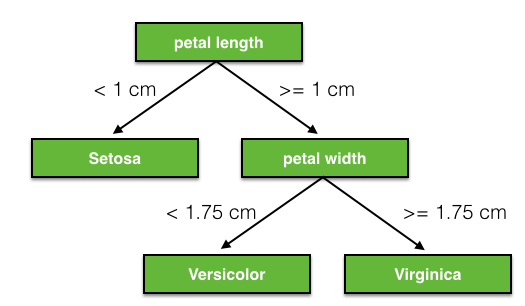

In [5]:
from IPython.display import Image

Image(filename="RandomForest/decision_tree_1.png",width=526, height=306)


Decision trees such as the one in the above image are tree-like graphs, where each node in the tree test evaluates conditions. The above tree uses two of the attributes from the Iris flower data set, petal length and petal width, and specifies conditions to determine which successive nodes are accessed. Since each node only splits into two other nodes, the condition requirements for each node are binary. The nodes at the bottom of the tree which no longer split are called the "leaves" of the tree, and indicate the class labels - i.e. Setosa, Versicolour, or Virginica.

### Random Forest - Analogy

#### Making a Decision - advice from friends

The scenario is as follows: I am looking to buy a lawnmower but am unsure of which brand is the best to buy. Thus, I perform the following tasks.

1) Ask several friends for advice

2) Determine the best lawnmower from this advice - this is Decision Tree.

3) Browse several different lawnmower shop locations, and ask advice from employees.

4) Browse online catelogs, and create forums seeking more advice on the best lawnmower.

5) Along the way, come up with different evaluation criteria for the best lawnmower (price, electric/gas powered, size, weight, etc.)

6) Pulling advice at random from all of my sources, determine the best lawnmower to buy. - This is Random Forest.


Credit for analogy: https://builtin.com/data-science/random-forest-algorithm


### Random Forest - Diagram

Diagram Source: https://blog.quantinsti.com/random-forest-algorithm-in-python/

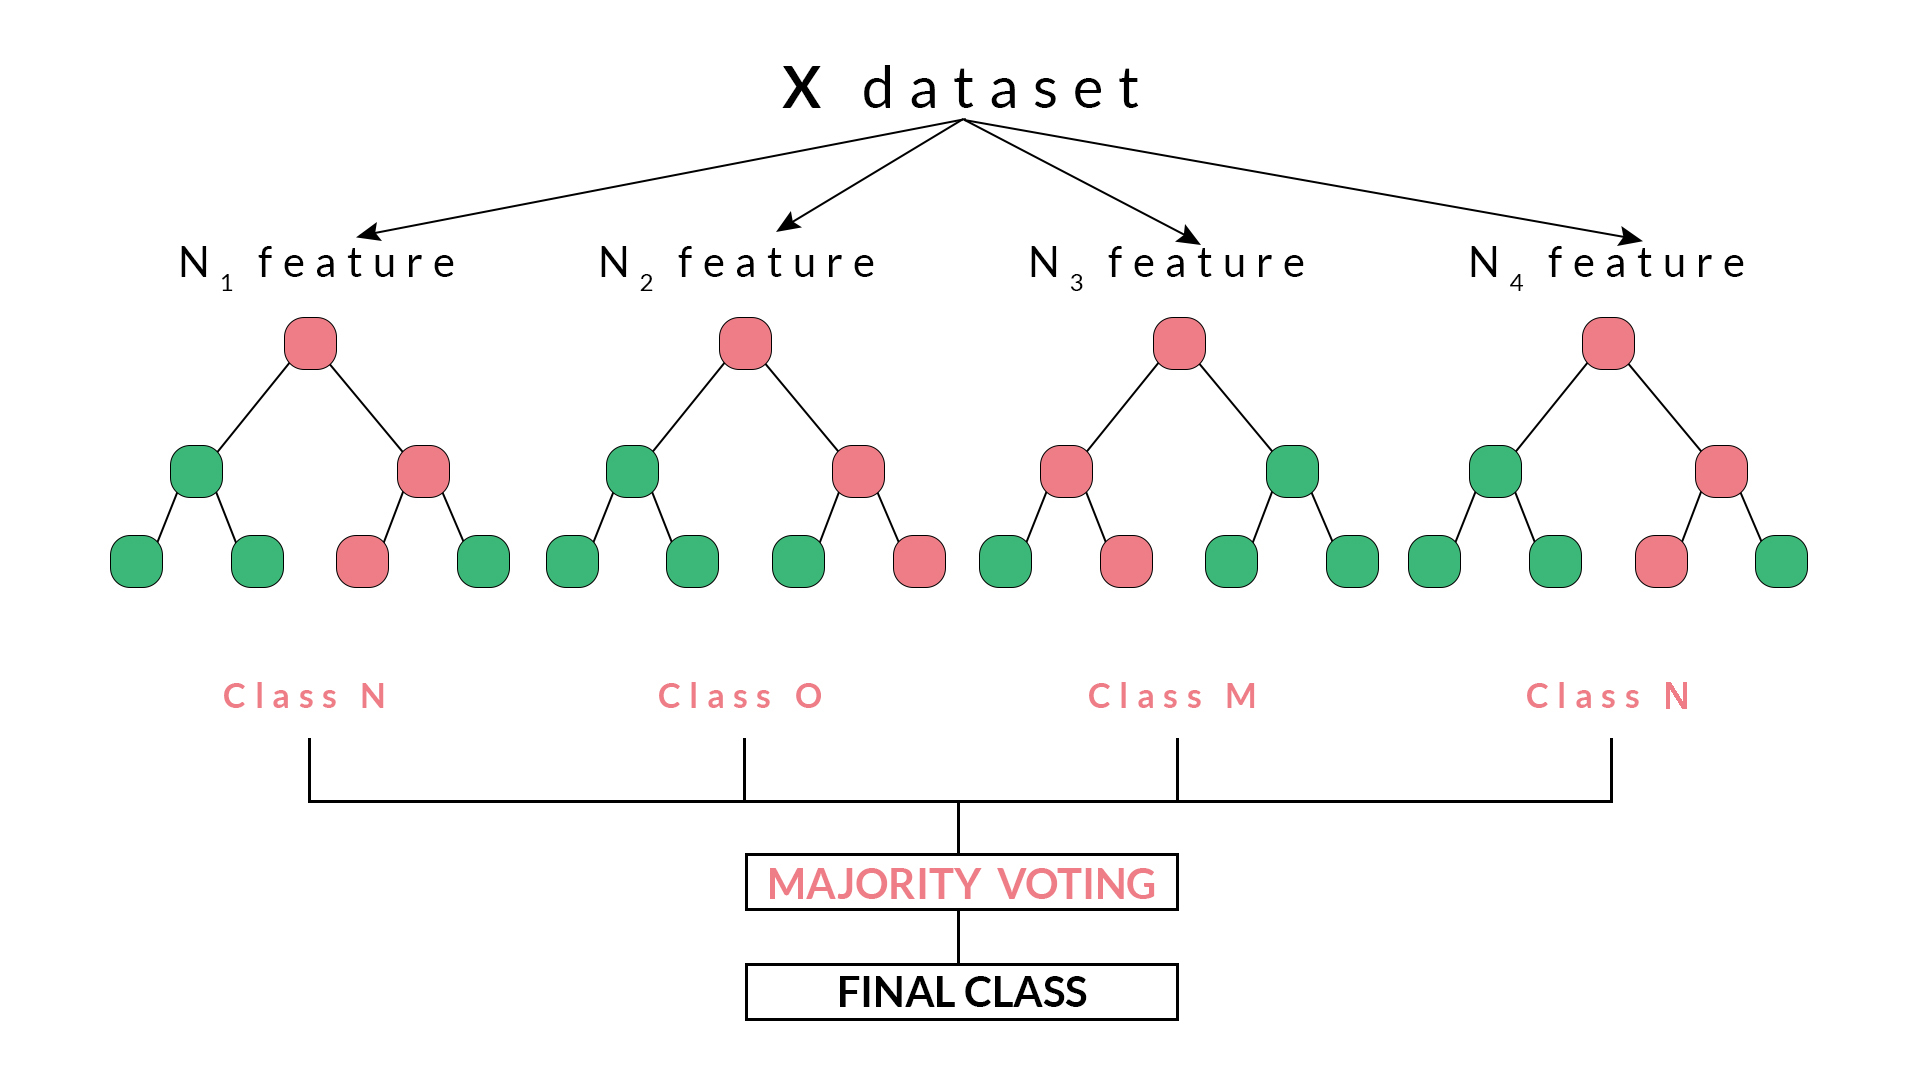

In [9]:
from IPython.display import Image

Image(filename="RandomForest/Random-Forest-Algorithm.jpg",width=726, height=506)

In determining the final class using RF, several random features and attributes from the dataset are selected to create multiple decision trees. In other words, RF makes an ensemble of subsets from the training data sets, and then predicts based on the majority of votes from the decision trees. The results from these decision trees are averaged (in classification, the mode is taken; in regression, the mean) to find the final class.

In forming a decision tree, we input the features and class labels into the decision tree which then creates rules in determining the classes for a set of data.

#### Random Forest: pros and cons

1) Randomness in decision tree generation, so random forest is quite versatile.

2) Randomness and having multiple decision trees helps to prevent overfitting.

3) Can be used for both classification and regression.

 

Cons:

1) If working with large datasets, generating many decision trees can be time-consuming.


### Accuracy comparison using breast-cancer data set

Below, I compare Decision Tree and Random Forest algorithms from sklearn on a dataset of breast cancer. In this example, we are using only classification (not regression), so the algorithm only needs to determine whether a tumor is begign or malignant based off of 30 attributes.

In [10]:
import numpy as np
data = np.loadtxt("Assignment15_datasets/wdbc.data", dtype = float, delimiter=',',usecols=(2,3,4,5,6,7,8,9,10,
                                                                                           11,12,13,14,15,16,17,
                                                                                           18,19,20,21,22,23,24,
                                                                                           25,26,27,28,29,30,31))
target = np.loadtxt("Assignment15_datasets/wdbc.data", dtype = str, delimiter=',', usecols=(1))

In [11]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target)

In [13]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
estimator.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
target_pred = estimator.predict(data_test)
accuracy = np.mean(target_test == target_pred)*100
print("Accuracy: {0:.1f} %".format(accuracy))

Accuracy: 93.7 %


In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator, data, target, scoring='accuracy', cv=5)
average_accuracy = np.mean(scores)*100
print("Average accuracy: {0:.1f}%".format(average_accuracy))

Average accuracy: 91.9%


In [16]:
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier()
estimator.fit(data_train, target_train)

C:\Users\durke\OneDrive\Documents\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
target_pred = estimator.predict(data_test)
accuracy = np.mean(target_test == target_pred)*100
print("Accuracy: {0:.1f} %".format(accuracy))

Accuracy: 96.5 %


In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator, data, target, scoring='accuracy', cv=5)
average_accuracy = np.mean(scores)*100
print("Average accuracy: {0:.1f}%".format(average_accuracy))

Average accuracy: 96.1%
